In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from math import factorial

# Сочетания
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

# Формула Бернулли
def bernulli(n,k,p):
    return (combinations(n,k) * (p ** k) * ((1 - p) ** (n - k)))

# Формула Пуассона
def puasson(n,m,p):
    lambda_ = n * p
    return (lambda_ ** m / factorial(m)) * np.exp(-lambda_)

import warnings
warnings.filterwarnings('ignore')

### № 1

**Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.**

In [7]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

**Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое:**

In [8]:
mean = np.sum(salary) / len(salary)
mean

65.3

проверка:

In [9]:
np.mean(salary)

65.3

**среднее квадратичное отклонение:**

In [10]:
disp = 0
for numb in salary:
    disp += (numb - mean) ** 2
std = np.sqrt(disp / len(salary))
std

30.823854398825596

проверка

In [11]:
np.std(salary)

30.823854398825596

**смещенную и несмещенную оценки дисперсий для данной выборки:**

In [12]:
print(f'несмещенная: {disp / len(salary)}\nсмещенная: {disp / (len(salary) - 2)}')

несмещенная: 950.11
смещенная: 1055.677777777778


проверка:

In [13]:
df_s = pd.DataFrame(salary)

print(f'несмещенная: {df_s.var(ddof=0)[0]}\nсмещенная: {df_s.var(ddof=2)[0]}')

несмещенная: 950.1100000000001
смещенная: 1055.6777777777777


**Сделать графическую интерпретацию данных, проанализовать выбросы...**

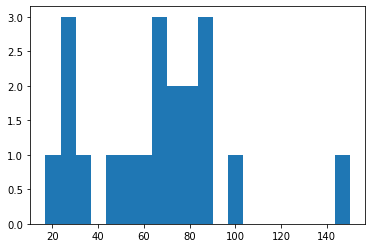

In [14]:
plt.hist(salary, bins=20)
plt.show()

Распределение значений не симметричное. Вырисовываются группы значений: 
- 17--33
- 45--65
- 70--90
- 100
- 150 (выброс)
Можно предположить, что это группы по специальностям.
Максимальная зарплата выпускников -- 100 у.е. Минимальная -- 17 у.е.
Но выборка маленькая, так что это все только предположения.

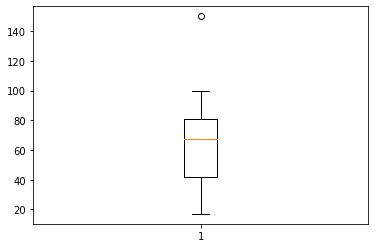

In [15]:
plt.boxplot(salary, widths=0.1)
plt.show()

На графике медиана проходит не по середине прямоугольника, т.е. снизу от медианы присутствует больше значений, чем сверху от нее. Следовательно, в данной выборке большинство выпускников получают зарплату менее 70 у.е.

Выбросов по минимальным значениям нет, а по максимумам -- все что больше 100 у.е. либо ошибочные данные, либо недостоверно из-за малой выборки.

In [16]:
salary_sort = np.sort(salary)
salary_sort

array([ 17,  24,  25,  30,  33,  45,  55,  57,  65,  65,  70,  75,  75,
        77,  80,  84,  89,  90, 100, 150])

In [17]:
lenght = len(salary)
lenght

20

**Медиана:**

В выборке четное количество элементов, следовательно будет 2 элемента по середине выборки, а медиана соответственно -- среднее от этих элементов.

In [18]:
(salary_sort[int(lenght / 2)] + salary_sort[int(lenght / 2) - 1]) / 2

67.5

проверка:

In [19]:
df_s.median()[0]

67.5

**Мода:**

In [20]:
count_numb = {}
for numb in salary:
    count_numb[numb] = (count_numb[numb] + 1) if numb in count_numb.keys() else 1

moda = []
for k, v in count_numb.items():
    if v == max(count_numb.values()):
        moda.append(k)
moda

[75, 65]

проверка:

In [22]:
df_s.mode()[0].tolist()

[65, 75]

т.е. выборка **мультимодальная**

**...посчитать квартили и интерквартильное расстояние**

In [23]:
df_s.quantile([0.25, 0.75])[0].tolist()

[42.0, 81.0]

In [24]:
81 - 42

39

### № 2

**В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?**

Имеем 2 * 4 = 8 вариантов сочетания мячей из двух ящиков, из которых нас интересуют:
- 0 белых мячей из первого ящика и 3 белых мяча из второго

In [25]:
combinations(5, 0) * combinations(5, 3)

10

- 1 белый мяч из первого и 2 -- из второго

In [26]:
combinations(5, 1) * combinations(5, 2)

50

- 2 белых мяча из первого и 1 -- из второго

In [27]:
combinations(5, 2) * combinations(5, 1)

50

Всего сочетаний вытаскивания мячей из двух ящиков:

In [28]:
combinations(8, 2) * combinations(12, 4)

13860

In [29]:
(10 + 50 + 50) / 13860

0.007936507936507936

### № 3

**В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?**

Дано:<br><ul style="list-style-type: none;">
    <li>A == B</li>
    <li>C = A + B</li>
    <li>A -- 0.8</li>
    <li>B -- 0.7</li>
    <li>C -- 0.9</li></ul>

Пусть студентов, поступивших на факультет А и В, будет по х, тогда<br>
х + х + 2х = 1 => <br>
x = 1/4 => вероятность сдачи сессии одним из студентов из любого факультета будет:<br>

In [31]:
1/4 * 0.8 + 1/4 * 0.7 + 1/2 * 0.9

0.825

вероятность, что студент, сдавший сессию, учится на факультете А:

In [32]:
1/4 * 0.8 / 0.825

0.24242424242424246

на факультете В:

In [33]:
1/4 * 0.7 / 0.825

0.21212121212121213

на факультете С:

In [34]:
1/2 * 0.9 / 0.825

0.5454545454545455

### № 4

**Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?**

**а). все детали:**

In [35]:
0.1 * 0.2 * 0.25

0.005000000000000001

**б). только две детали**

Имеем три варианта развития событий:
<table>
    <tr><td>№ детали</td><td colspan=3></tr>
    <tr><td>1</td><td>+</td><td>+</td><td>-</td></tr>
    <tr><td>2</td><td>+</td><td>-</td><td>+</td></tr>
    <tr><td>3</td><td>-</td><td>+</td><td>+</td></tr>
</table>
Т.е. для первого варианта: первая (0.1) и вторая (0.2) детали выходят из строя и при этом третья деталь не выходит из строя, следовательно (1 - 0.25 = 0.75). Точно также считаем и для остальных двух вариантов развития события, в итоге получится:

In [36]:
0.1 * 0.2 * 0.75 + 0.1 * 0.25 * 0.8 + 0.2 * 0.25 * 0.9

0.08000000000000002

**в). хотя бы одна деталь**

Когда только одна деталь из трех выходит из строя имеет 3 варинта развития событий:

<table>
    <tr><td>1</td><td>+</td><td>-</td><td>-</td></tr>
    <tr><td>2</td><td>-</td><td>+</td><td>-</td></tr>
    <tr><td>3</td><td>-</td><td>-</td><td>+</td></tr>
</table>

In [37]:
0.1 * 0.8 * 0.75 + 0.2 * 0.9 * 0.75 + 0.25 * 0.9 * 0.8

0.375

Варианты, когда из строя выходят две детали из трех и когда все три детали выходят из строя, нас тоже интересуют, т.к. это тоже будет относиться к условию "хотя бы одна деталь", а значит имеем:

In [38]:
0.1 * 0.8 * 0.75 + 0.2 * 0.9 * 0.75 + 0.25 * 0.9 * 0.8 + \
0.1 * 0.2 * 0.75 + 0.1 * 0.25 * 0.8 + 0.2 * 0.25 * 0.9 + \
0.1 * 0.2 * 0.25

0.46

г). от одной до двух деталей

In [39]:
0.1 * 0.8 * 0.75 + 0.2 * 0.9 * 0.75 + 0.25 * 0.9 * 0.8 + \
0.1 * 0.2 * 0.75 + 0.1 * 0.25 * 0.8 + 0.2 * 0.25 * 0.9

0.455